In [1]:
pip install keras_metrics

In [2]:
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import keras_metrics as km
from keras import regularizers, optimizers
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
data_dir ="/content/gdrive/My Drive/video_data"
img_height , img_width = 64, 64
seq_len = 16

In [5]:
classes = [ 'climb', 'fall', 'grab', 'mouth', 'walk','fall_down','eat', 'sit']

In [6]:
def frames_extraction(video_path):
    frames_list = []
     
    vidObj = cv2.VideoCapture(video_path)
    # Used as counter variable 
    count = 1
 
    while count <= seq_len: 
         
        success, image = vidObj.read() 
        if success:
            image = cv2.resize(image, (img_height, img_width))
            frames_list.append(image)
            count += 1
        else:
            print("Defected frame")
            break
 
            
    return frames_list

In [7]:
def create_data(input_dir):
    X = []
    Y = []
     
    classes_list = os.listdir(input_dir)
     
    for c in classes_list:
        print(c)
        files_list = os.listdir(os.path.join(input_dir, c))
        for f in files_list:
            frames = frames_extraction(os.path.join(os.path.join(input_dir, c), f))
            if len(frames) == seq_len:
                X.append(frames)
             
                y = [0]*len(classes)
                y[classes.index(c)] = 1
                Y.append(y)
     
    X = np.asarray(X)
    Y = np.asarray(Y)
    return X, Y

In [8]:
def schedular(epochs):
  if epochs < 10:
    return 0.001

  else:
    return 0.001 * math.exp(0.1*(10-epochs))

  learning_rate_schedular= tf.keras.callbacks.LearningRateScheduler(schedular)

In [ ]:
 
X, Y = create_data(data_dir)
 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=True, random_state=0)

In [10]:

 
model = Sequential()

model.add(ConvLSTM2D(filters = 64, kernel_size = (3, 3), strides=(2,2), return_sequences = False, padding= 'same', activation= 'relu', data_format = "channels_last", input_shape = (seq_len, img_height, img_width, 3)))
model.add(BatchNormalization())

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))


model.add(Dense(8, activation = "softmax"))


 
model.summary()

climb
walk
Defected frame
Defected frame
grab
fall
mouth
eat
fall_down
sit
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 32, 32, 64)        154624    
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 65536)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               16777472  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_______________________________________________

In [ ]:
print(Defected frame)

SyntaxError: ignored

In [11]:
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
 
earlystop = EarlyStopping(patience=7)
callbacks = [earlystop]
 
history = model.fit(x = X_train, y = y_train, epochs=10, batch_size = 16 , shuffle=True, validation_split=0.2, callbacks=callbacks)
 
y_pred = model.predict(X_test) 
y_pred = np.argmax(y_pred, axis = 1)
y_test = np.argmax(y_test, axis = 1)
 
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
35/35 [==============================] - 290s 8s/step - loss: 6.6099 - accuracy: 0.2313 - val_loss: 57.5594 - val_accuracy: 0.2446
Epoch 2/10
35/35 [==============================] - 265s 8s/step - loss: 3.3271 - accuracy: 0.4458 - val_loss: 50.3845 - val_accuracy: 0.2806
Epoch 3/10
35/35 [==============================] - 266s 8s/step - loss: 4.6119 - accuracy: 0.4807 - val_loss: 344.8374 - val_accuracy: 0.2878
Epoch 4/10
35/35 [==============================] - 268s 8s/step - loss: 5.6821 - accuracy: 0.3333 - val_loss: 318.3472 - val_accuracy: 0.3022
Epoch 5/10
35/35 [==============================] - 268s 8s/step - loss: 5.2281 - accuracy: 0.2493 - val_loss: 90.8960 - val_accuracy: 0.1151
Epoch 6/10
35/35 [==============================] - 266s 8s/step - loss: 2.9152 - accuracy: 0.2345 - val_loss: 4.3695 - val_accuracy: 0.2230
Epoch 7/10
35/35 [==============================] - 266s 8s/step - loss: 2.0235 - accuracy: 0.2569 - val_loss: 2.2630 - val_accuracy: 0.2374
Epoch 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


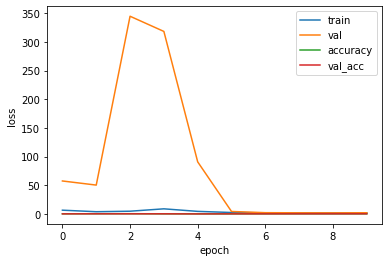

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val','accuracy','val_acc'])
plt.show()

In [ ]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

NameError: ignored